In [5]:
import aplpy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
import pyfits

import numpy as np


import random
import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import aplpy
from astropy.io import fits
import astropy.io.ascii as ascii 
import os
import numpy as np
from astropy import units as u
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams.update({'font.size': 26})
matplotlib.rcParams['axes.linewidth'] = 2.0 #set the value globally
matplotlib.rcParams['xtick.labelsize']=26
matplotlib.rcParams['ytick.labelsize']=26
matplotlib.rcParams['axes.labelsize']=26
#matplotlib.rcParams['lines.linewidth']=2 


INFO: Auto-setting vmin to -2.936e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.949e+01 [aplpy.core]


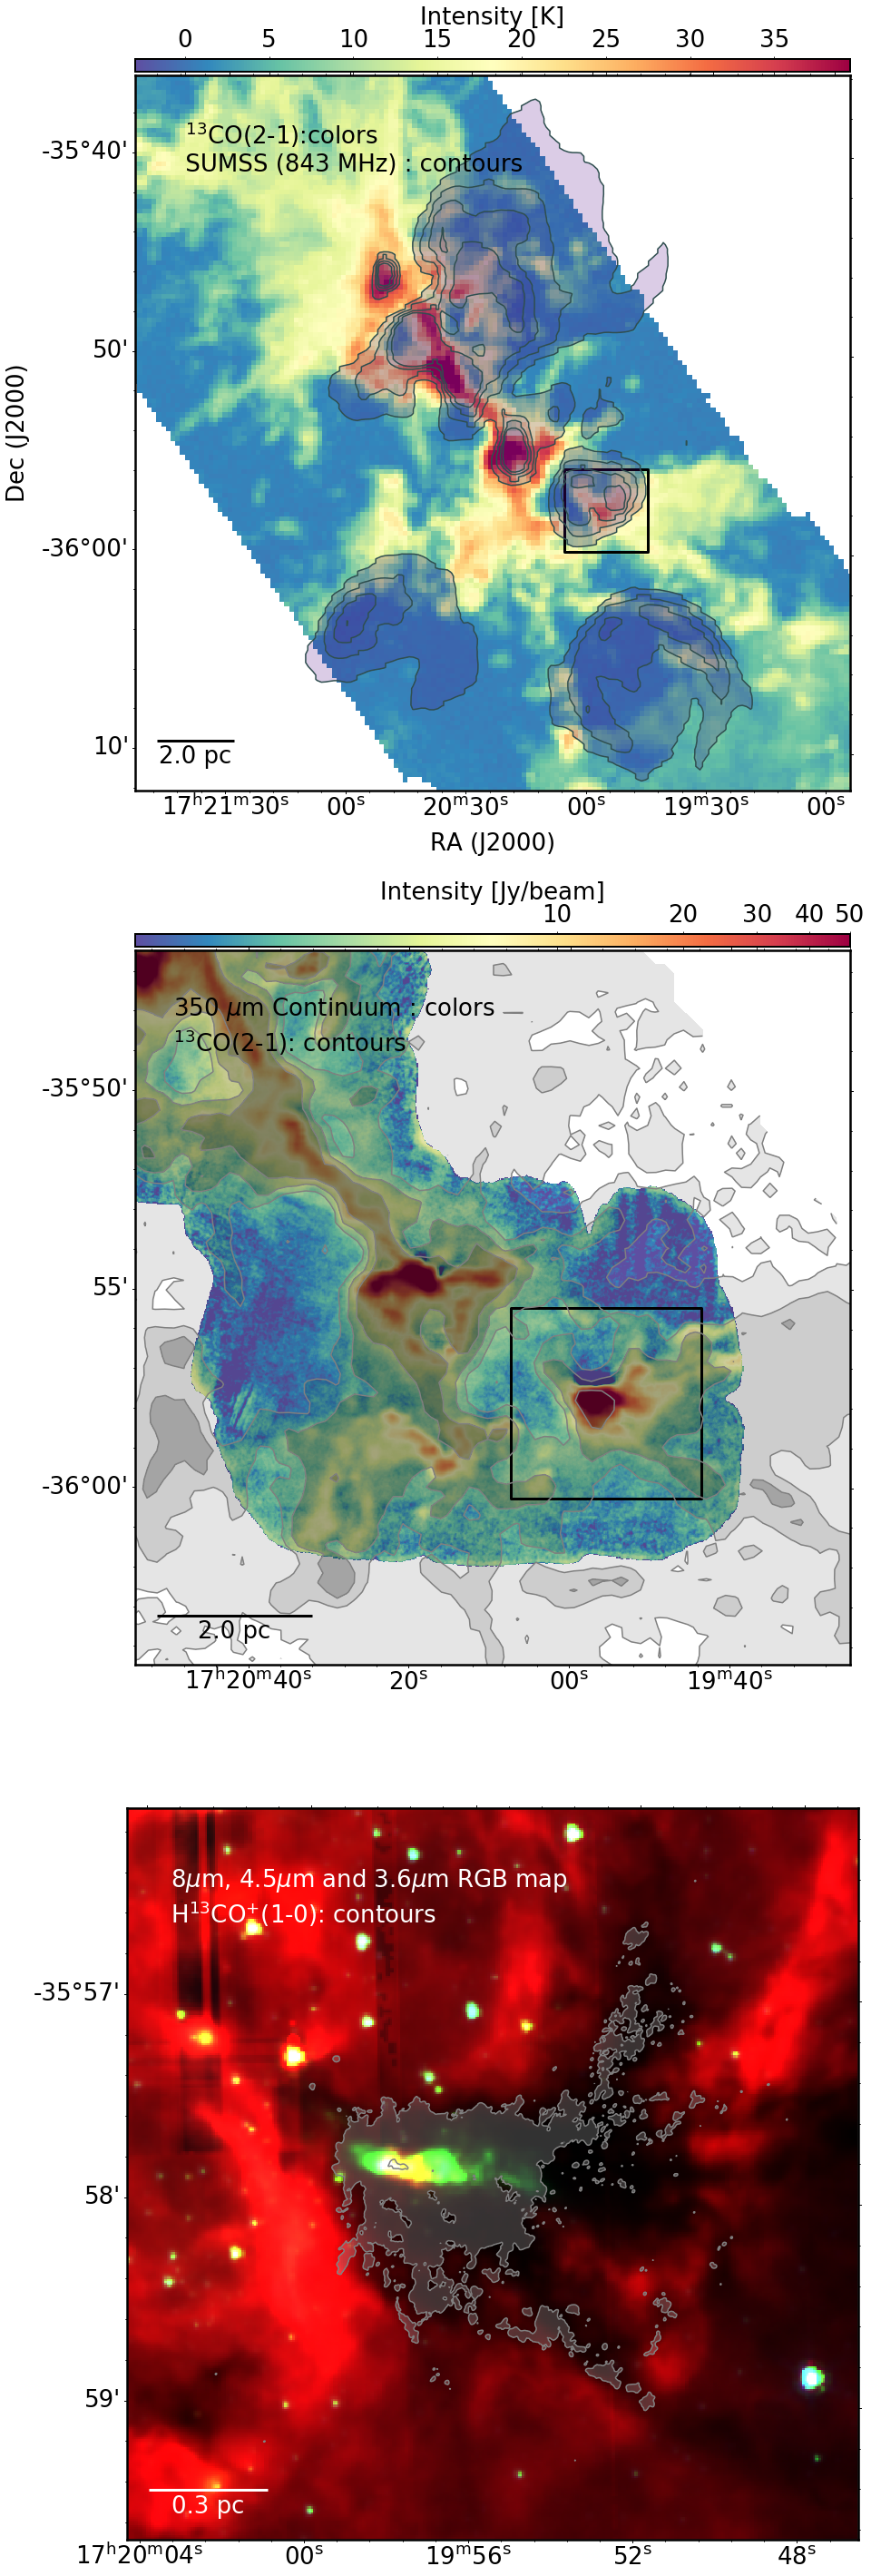

In [9]:


apex_im = '../../../data/Apex_ngc6334/13co_apex_J2000_peak_new.fits'
spitzer_rgb = '../../../data/spitzer/spitzer_cube_2d.fits'
spitzer_rgb_png = '../../../data/spitzer/spitzer_rgb.png'
artemis_im = '../../../data/Artemis_ngc6334/ngc6334_artemis_spire_350_editunitJybeam.fits'
htcop_smooth = '../../../data/alma_data/spw7_h13co+/H13COp_subimage24ch_peak_smooth5arcsec.fits'

sumss= '../../../data/SUMSS843_Veena/NGC6334_SUMSS.fits'

htcop ='../../../data/alma_data/spw7_h13co+/h13cop_peak_delheader.fits'
Hii_reg = '../../../data/HII_data/cub442_6334_cent_coor_delhead.fits'


fig = plt.figure(figsize=(15, 40)) #figsize=(15, 45)
#fig, ax = plt.subplots(figsize=(16, 40)) #

#############################################################################################
#APEX 13CO
f11 = aplpy.FITSFigure(apex_im, figure=fig, subplot=(3, 1, 1))# subplot=[0.1,0.1,0.75,0.2] 4 rows, 1 column, plot 1
f11.show_colorscale(cmap= 'Spectral_r')
f11.recenter(  260.1,  -35.90 , width=0.600, height=0.600)
f11.show_rectangles(259.98125,  -35.96444444 , width=0.070, height=0.070, color='k', lw=3)
#f11.show_contour(Hii_reg, colors='indigo', levels=[28, 10000], filled=True, lw=1.5, alpha=0.2)
#f11.show_contour(Hii_reg, colors='indigo', levels=[56, 10000], filled=True, lw=1.5, alpha=0.2)
#f11.show_contour(Hii_reg, colors='darkslategray', levels=[28, 56 ], alpha=1, lw=1.5)

f11.show_contour(sumss, colors='indigo', levels=[0.1, 100], filled=True, lw=1.5, alpha=0.2)
f11.show_contour(sumss, colors='indigo', levels=[0.4, 100], filled=True, lw=1.5, alpha=0.1)
f11.show_contour(sumss, colors='indigo', levels=[0.8, 100], filled=True, lw=1.5, alpha=0.1)
f11.show_contour(sumss, colors='indigo', levels=[1.2, 100], filled=True, lw=1.5, alpha=0.1)
f11.show_contour(sumss, colors='darkslategray', levels=[0.1,0.4, 0.8,1.2 ], alpha=1, lw=1.5)

f11.add_colorbar()

f11.colorbar.set_axis_label_text('Intensity [K]')
f11.colorbar.set_location('top')
#f11.set_title('$\mathrm{{}^{13}CO}$(2-1) peak intensity map') #, fontsize = 18

#plt.text(0.06, -8, ' $\mathrm{{}^{13}CO}$(2-1):colors \n H$\mathrm{\u03B1}$ : contours', fontsize=26 , horizontalalignment='left', verticalalignment='bottom', color='k') # 0.12, 0.8
plt.text(0.06, -8, ' $\mathrm{{}^{13}CO}$(2-1):colors \n SUMSS (843 MHz) : contours', fontsize=26 , horizontalalignment='left', verticalalignment='bottom', color='k') # 0.12, 0.8


f11.add_scalebar(2.0/(1760*4.84813681e-6*3600), "2.0 pc", color='k', linewidth=3.0, corner='bottom left') #, fontsize = 30
f11.frame.set_linewidth(2.5)
f11.frame.set_color('black')


#############################################################################################
#Artemis (13CO contours)

f21 = aplpy.FITSFigure(artemis_im, figure=fig, subplot=(3, 1, 2)) # subplot=[0.1,-0.14,0.75,0.2]
f21.recenter(  260.04,  -35.92444444 , width=0.300, height=0.300)

artms = apex_im
f21.show_contour(artms, stretch='linear', colors='k', levels=[1, 100], filled=True, lw=0.5, alpha=0.1)
f21.show_contour(artms, stretch='linear', colors='k', levels=[8, 100], filled=True, lw=0.5, alpha=0.1)
f21.show_contour(artms, stretch='linear', colors='k', levels=[16, 100], filled=True, lw=0.5, alpha=0.2)
f21.show_contour(artms, stretch='linear', colors='k', levels=[26, 100], filled=True, lw=0.5, alpha=0.2)
f21.show_contour(artms, colors='gray', alpha=1, levels=[1, 8, 16, 26 ])
f21.show_rectangles(259.98125,  -35.96444444 , width=0.080, height=0.080, color='k', lw=3)

f21.show_colorscale( cmap='Spectral_r', stretch= 'log', vmin= 1, vmax=50) #, stretch= 'log',vmin=4.611e+02, vmax=3.0e+04
#f21.tick_labels.hide()
f21.axis_labels.hide()
#f21.set_title('350 $\mu$m Continuum (colors) - $\mathrm{{}^{13}CO}$ (contours)') #ArT\'eMiS: , fontsize = 30
plt.text(600, 540, ' 350 $\mu$m Continuum : colors \n $\mathrm{{}^{13}CO}$(2-1): contours', fontsize=26 , horizontalalignment='left', verticalalignment='bottom', color='k') # 0.12, 0.8


f21.add_scalebar(2.0/(1760*4.84813681e-6*3600), "2.0 pc", color='k', linewidth=3.0, corner='bottom left') 
f21.add_colorbar()
f21.colorbar.set_location('top')
#cbar = f21.colorbar(artms)
#f21.colorbar.set_ticklabels(['0','1','2','3', '4', '5'])
#cbar.set_label('# of contacts', rotation=270)

f21.colorbar.set_axis_label_text('Intensity [Jy/beam]')
f21.frame.set_linewidth(2.5)
f21.frame.set_color('black')

#f21.colorbar.set_location('top')
#############################################################################################
#spitzer rgb (ALma contours)


f12 = aplpy.FITSFigure(spitzer_rgb, figure=fig, subplot=(3, 1, 3) )# , subplot=[0.1,-0.38,0.75,0.2]  4 rows, 1 column, plot 1
f12.show_rgb(spitzer_rgb_png)
#f12 = aplpy.make_rgb_image('spitzer_cube.fits','spitzer_rgb.png', vmax_r = 900.0, vmax_g = 200.0, vmax_b = 800.0)

datah, header =fits.getdata(htcop_smooth, header = True)
artms0=datah[0,:,:]
f12.show_contour(artms0, colors='white', alpha=1, levels=[0, 0.5, 1])

f12.recenter(259.98125,  -35.96444444 , width=0.060, height=0.060)
#f12.show_rectangles(259.98125,  -35.96444444 , width=0.080, height=0.080, color='w', lw=2)
#f12.show_colorscale(cmap='viridis')
#f12.tick_labels.hide()
f12.axis_labels.hide()
#f12.add_colorbar()
#f12.set_title('8$\mu$m, 4.5$\mu$m and 3.6$\mu$m RGB map') #, fontsize = 18
f12.add_scalebar(0.3/(1760*4.84813681e-6*3600), "0.3 pc", color='w', linewidth=3.0, corner='bottom left')  # fontsize = 18, 

f12.show_contour(htcop, stretch='linear', colors='w', levels=[0.025, 100], filled=True, lw=0.5, alpha=0.2)
f12.show_contour(htcop, colors='gray', alpha=1, levels=[0.025])
f12.frame.set_linewidth(2.5)
f12.frame.set_color('black')
plt.text(105, 390, ' 8$\mu$m, 4.5$\mu$m and 3.6$\mu$m RGB map \n $\mathrm{{H}^{13}CO^{+}}$(1-0): contours', fontsize=26 , horizontalalignment='left', verticalalignment='bottom', color='w') # 0.12, 0.8

#f12.add_colorbar()'''
''' 
totalFilamentNumber = 6
graynumber= np.arange(1,22,1)
number=np.arange(1,7,1)
colors = plt.cm.tab10(np.linspace(0.,1.,10))
for ii in number:
    try:
        filData = np.loadtxt('/home/mitra/Documents/projects/ngc6334/filaments/New_filament_2022/spitzer_space/fil_'+str(ii)+'_spitzer.txt')
        x,y = filData[:,0],filData[:,1]
        plt.plot(x,y, '-', markersize=3, label = 'F'+str(ii), linewidth=4.0, color = colors[ii])
        plt.text(x[(len(x)/2)]+5, y[(len(y)/2)]+5, 'F'+str(ii), fontsize= 'x-large')
    except (IOError,IndexError):
        pass
plt.legend()
    
   
#############################################################################################
#ALma h13co+ 


f22 = aplpy.FITSFigure(htcop_smooth, figure=fig, subplot=(2, 2, 4))
f22.show_colorscale( cmap='Spectral_r')
#f22.tick_labels.hide()
#f22.axis_labels.hide()
#f22.add_colorbar()
f22.set_title('ALMA: $\mathrm{H^{13}CO^{+}}$ peak intensty 5$\sigma$ smoothed (color map)', fontsize = 18)
 

totalFilamentNumber = 6
graynumber= np.arange(1,22,1)
number=np.arange(1,7,1)

#for ii in range(1 , totalFilamentNumber):
#colors = plt.cm.prism(np.linspace(0.,1.,14))
colors = plt.cm.tab10(np.linspace(0.,1.,10))
for ii in number:
    try:
        filData = np.loadtxt('/home/mitra/Documents/projects/ngc6334/filaments/New_filament_2022/txt_regions/filament_'+str(ii)+'.txt')
        x,y = filData[:,0],filData[:,1]
        plt.plot(x,y, '-', markersize=3, label = 'F'+str(ii), linewidth=4.0, color = colors[ii])
        plt.text(x[(len(x)/2)]+5, y[(len(y)/2)]+5, 'F'+str(ii), fontsize= 'x-large')
    except (IOError,IndexError):
        pass
plt.legend()


'''

fig.tight_layout()
fig.savefig('plots/apex_artemis_spitzerP.pdf',  bbox_inches='tight', dpi = 300) #, dpi = 600
#fig.canvas.draw()


In [ ]:

'''
f11.tick_labels.set_font(rotation=90) #size='medium', weight='normal',

f11.axis_labels.set_font(size='large', weight='normal')
f11.ticks.set_length(10)
f11.ticks.set_color('k')
f11.ticks.set_linewidth(2)
f11.tick_labels.set_yformat('dd:mm:ss')
f11.tick_labels.set_xformat('hh:mm:ss')
f11.tick_labels.set_yformat('ddd')
f11.tick_labels.set_xformat('ddd')
f11.axis_labels.set_xpad(0.01)
f11.ticks.show()
#ax.tick_params(axis='both', which='both', direction='in')

#plt.yticks(rotation='vertical')
#f11.set_xticklabels(rotation=45)
#f11.tick_labels.hide()
#f11.axis_labels.hide()
'''

In [67]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
import pyfits

import numpy as np





Fitsname = '../../../data/alma_data/spw7_h13co+/h13cop_feather_vel'
FileName = Fitsname +'.fits'
data, header = fits.getdata(Fitsname + '.fits', header = True)

hdu_list = fits.open(FileName)
image_data = hdu_list[0].data
print(data.shape)
image_data = hdu_list[0].data
maximun = np.amax(image_data[:,:,:,:], axis=1)         # taking the max. value of each pixel 
maximun[maximun==0]=None

print(maximun.shape)

#data_cube = data_cube[0,:,:]
fits.writeto('../../../data/alma_data/spw7_h13co+/h13cop_peak.fits', maximun, header, overwrite=True)

(1, 480, 1280, 1280)
(1, 1280, 1280)


In [58]:
data, header = fits.getdata('../../../data/alma_data/spw7_h13co+/H13COp_subimage24ch_peak_smooth5arcsec.fits', header = True)
#data[:,:] = data[1,1,:,:]
print(data.shape)

(1, 1280, 1280)


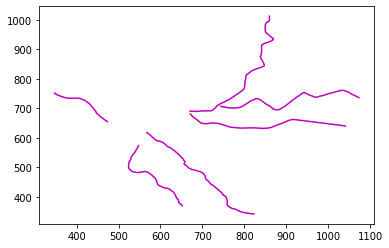

In [150]:
######ovalay filments on image ##################
#################################################
totalFilamentNumber = 6

number=np.arange(1,7,1)

#for ii in range(1 , totalFilamentNumber):
colors = plt.cm.prism(np.linspace(0,1,20))
for ii in number:
    try:
        filData = np.loadtxt('/home/mitra/Documents/projects/ngc6334/filaments/New_filament_2022/txt_regions/filament_'+str(ii)+'.txt')
        x,y = filData[:,0],filData[:,1]
        plt.plot(x,y, '-', markersize=3, label = 'F'+str(ii), color = 'm')
        plt.text(x[(len(x)/2)]+5, y[(len(y)/2)]+5, 'F'+str(ii), fontsize= 'x-large', color = 'orchid')
    except (IOError,IndexError):
        pass




In [149]:
for ii in range(1,7):
    filData = np.loadtxt('/home/mitra/Documents/projects/ngc6334/filaments/New_filament_2022/txt_regions/filament_'+str(ii)+'.txt')
    x,y = filData[:,0],filData[:,1]